<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/update/19.%20Machine%20Learning/Learn%20-%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn - Regression
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)

___

# Importing Libraries

In [72]:
# basic
import pandas as pd
import numpy as np
import scipy.stats as stats

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading Dataset

In [2]:
path = 'https://raw.githubusercontent.com/ganjar87/data_science_practice/main/bikesharing_day.csv'

data = pd.read_csv(path)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.duplicated().sum()

0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


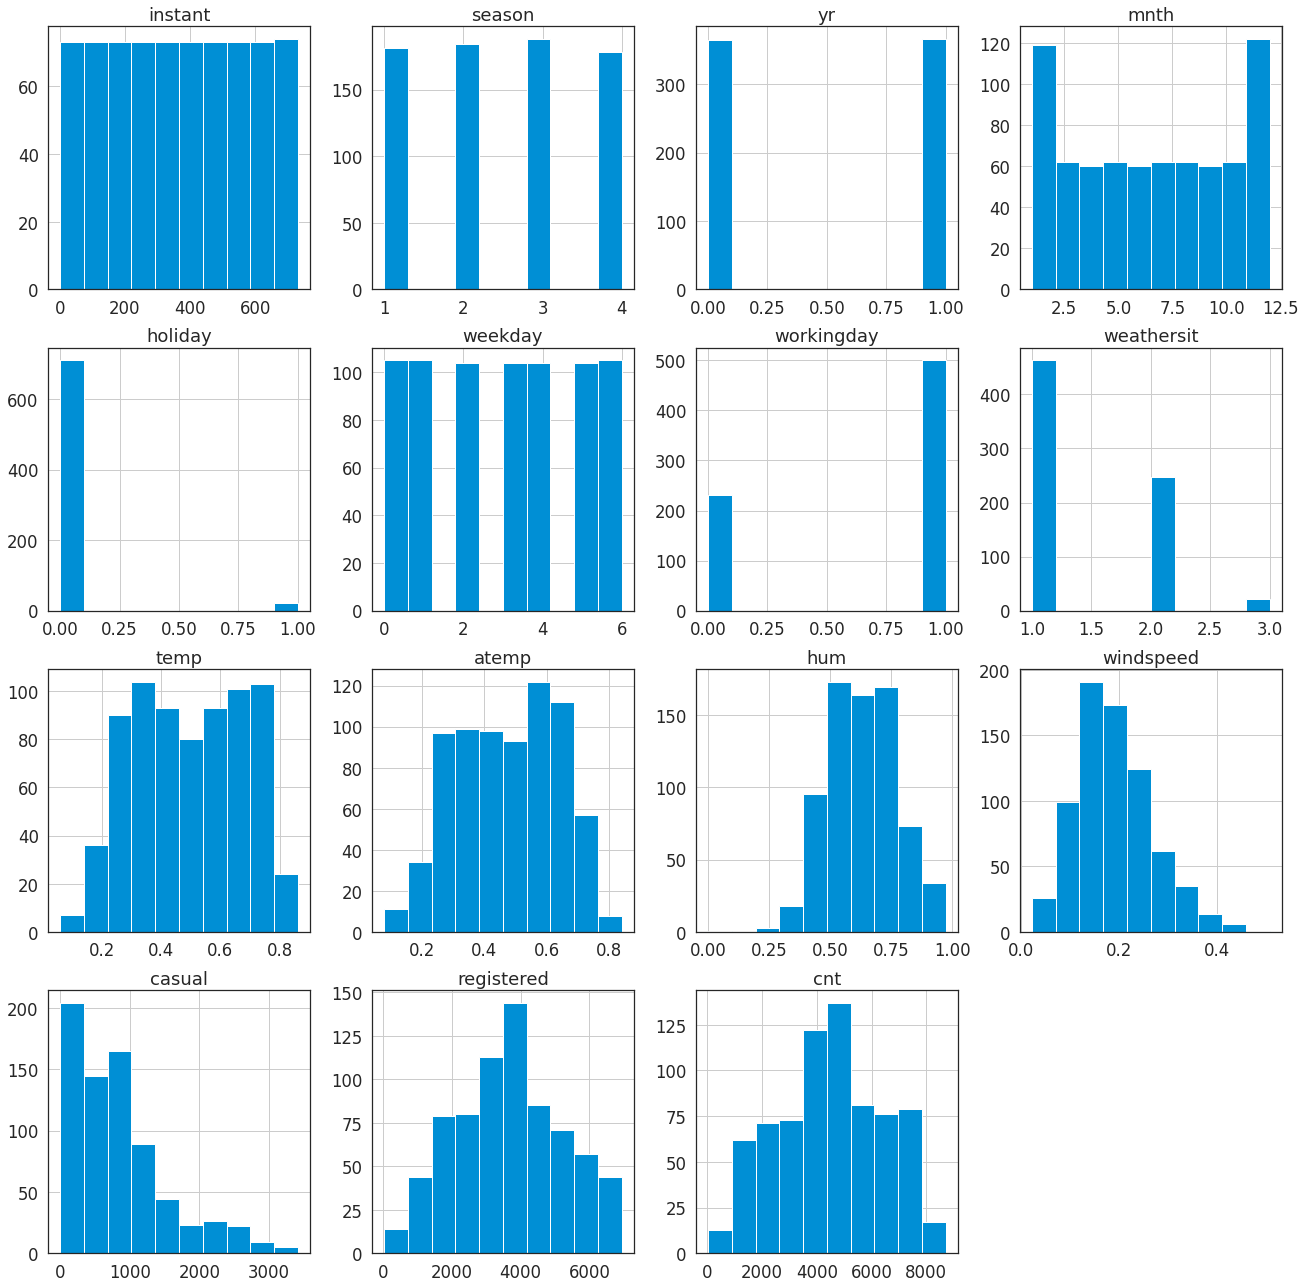

In [9]:
data.hist(figsize=(18,18))

plt.tight_layout()
plt.show()

In [13]:
data.drop(['instant', 'dteday'], axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Data Preprocessing

## Train - Test Split

In [14]:
data_X = data.drop(['cnt'], axis=1)
data_y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1)

## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [36]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

for i in data.columns[:-1]:
  scaler_x = MinMaxScaler()
  scaler_x.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler_x.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler_x.transform(X_test_scale[[i]])

In [37]:
y_train_scale = y_train.copy()
y_test_scale = y_test.copy()

scaler_y = MinMaxScaler()
scaler_y.fit(pd.DataFrame(y_train_scale))

y_train_scale = scaler_y.transform(pd.DataFrame(y_train_scale))
y_test_scale = scaler_y.transform(pd.DataFrame(y_test_scale))

# Linear Regression

## Training Model

In [38]:
model_lr = LinearRegression()
model_lr.fit(X_train_scale, y_train_scale)

## Making Prediction

In [78]:
y_pred = model_lr.predict(X_test_scale)

In [40]:
y_test_scale[:5]

array([[0.41035857],
       [0.20318725],
       [0.42062055],
       [0.46975733],
       [0.7436919 ]])

In [41]:
y_pred[:5]

array([[0.41035857],
       [0.20318725],
       [0.42062055],
       [0.46975733],
       [0.7436919 ]])

In [42]:
scaler_y.inverse_transform(y_test_scale[:5])

array([[3830.],
       [2114.],
       [3915.],
       [4322.],
       [6591.]])

In [43]:
y_test[:5]

404    3830
726    2114
159    3915
422    4322
512    6591
Name: cnt, dtype: int64

In [45]:
model_lr.coef_

array([[ 4.96628635e-17,  3.88578059e-16, -1.11022302e-16,
        -4.33680869e-16, -3.52148866e-16, -2.33320308e-16,
        -1.94289029e-16,  1.22124533e-15, -6.52256027e-16,
        -4.37150316e-16, -6.93889390e-17,  3.91524810e-01,
         7.88361705e-01]])

## Model Evaluation

### Pearson's Correlation Coefficient

In [77]:
r = stats.pearsonr(y_test_scale.flatten(), y_pred.flatten())
r_squared = r[0]*r[0]

print('Pearson\'s correlation coefficient\t:', r[0])
print('Correlation of Determination\t\t:', r_squared)

Pearson's correlation coefficient	: 1.0
Correlation of Determination		: 1.0


### Correlation of Determination

In [53]:
print('R-squared of training set\t:', model_lr.score(X_train_scale, y_train_scale))
print('R-squared of testing set\t:', model_lr.score(X_test_scale, y_test_scale))

R-squared of training set	: 1.0
R-squared of testing set	: 1.0


In [56]:
print('R-squared\t:', r2_score(y_test_scale, y_pred))

R-squared	: 1.0


### Mean Squared Error

In [60]:
mse = mean_squared_error(y_test_scale, y_pred)
rmse = np.sqrt(mse)

print('MSE\t:', mse)
print('RMSE\t:', rmse)

MSE	: 3.198670899630143e-31
RMSE	: 5.655679357628174e-16
